# Unsupervised Capstone Project
# Goal: Build an unsupervised model that will classify authors based on the style of writing using natural language processing.
 

In [562]:
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 100)

# Define functions to clean, lemmatize and process the text file as a string.

In [563]:
#This function expects a raw string. The purpose of this function is to take the string
#text and remove double dashes, punctuactions and special characters.
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    #text = re.sub(r'[\r|\n|\r\n]+', "", text)
    text = re.sub('[^a-zA-z0-9\s]', "", text)
    text = ' '.join(text.split())
    return text

In [564]:
#define a function to lemmatize the list
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
#nlp = spacy.load('en', parse = False, tag=False, entity=False)


#create a function to lemmatize the text in the combine list
def lemmatizestring(text):

    lmtzr = WordNetLemmatizer()

    return(" ".join([lmtzr.lemmatize(word) for word in word_tokenize(text)]))
    
    #using the following line of code creates a [E088] Text of length 1166183 exceeds maximum of 1000000.
    #text = nlp(text)
    #text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    #return text

In [565]:
#The function will take a raw text string and tokenize the words for given number. 
#For example, if the function is given a raw text string and the 1000 as input parameters
#it will create 1000 tokenized words store it in a list and repeat the process. The result 
#will be multiple lists equal to the num_of_words parametar.
#The purpose of this function is create a list of words that can be passed as input parameters 
#to our tfidf function that is used to create featurs.

def chunck_words_old(text,num_of_words):
    
    text = text.split(' ') #split on whitespace creates a token
    results = []
    res = []
    for word in text:
        res.append(word)
        if len(res)==num_of_words:
            results.append(" ".join(res))
            res = []
    results.append(" ".join(res))
    return(results) 

def chunck_words(text,num_of_words,source):
    text = text.split(' ') #split on whitespace creates a token
    results = []
    res = []
    author = []
    for word in text: #take 1000 words of text
        res.append(word) #add the words to a list one by one
        if len(res)==num_of_words: # When there are a total of 100 words
            results.append(" ".join(res)) #join the words together into a string by removing the white space
            author.append(source)
            res = [] #clear the list
    results.append(" ".join(res)) #print the final string with all of the words together
    author.append(source)
    return(results,author)

# Import text files in string format from ten different authors/sources. Execute functions to clean, lemmatize and process the files.

In [566]:
#load in the documents from nltk in a raw string 
#gutenberg.raw
#:return: the given file(s) as a single string.
#:rtype: str
caesar_raw_string = gutenberg.raw('shakespeare-caesar.txt')
hamlet_raw_string = gutenberg.raw('shakespeare-hamlet.txt')
macbeth_raw_string = gutenberg.raw('shakespeare-macbeth.txt')
ball_raw_string = gutenberg.raw('chesterton-ball.txt')
brown_raw_string = gutenberg.raw('chesterton-brown.txt')
thursday_raw_string = gutenberg.raw('chesterton-thursday.txt')
moby_dick_raw_string = gutenberg.raw('melville-moby_dick.txt')
bryant_raw_string = gutenberg.raw('bryant-stories.txt')
leaves_raw_string = gutenberg.raw('whitman-leaves.txt')
busterbrown_raw_string = gutenberg.raw('burgess-busterbrown.txt')

In [567]:
#Verify output
#macbeth_raw_string

In [568]:
#Clean the raw file loaded as a string and print the output
caesar_cleaned_text = text_cleaner(caesar_raw_string)
hamlet_cleaned_text = text_cleaner(hamlet_raw_string)
macbeth_cleaned_text = text_cleaner(macbeth_raw_string)
ball_cleaned_text = text_cleaner(ball_raw_string)
brown_cleaned_text = text_cleaner(brown_raw_string)
thursday_cleaned_text = text_cleaner(thursday_raw_string)
moby_dick_cleaned_text = text_cleaner(moby_dick_raw_string)
bryant_cleaned_text = text_cleaner(bryant_raw_string)
leaves_cleaned_text = text_cleaner(leaves_raw_string)
busterbrown_cleaned_text = text_cleaner(busterbrown_raw_string)

In [569]:
#Verify output
#macbeth_cleaned_text

In [570]:
#Lemmatize the file to show the root words
caesar_lemmatize_text = lemmatizestring(caesar_cleaned_text)
hamlet_lemmatize_text = lemmatizestring(hamlet_cleaned_text)
macbeth_lemmatize_text = lemmatizestring(macbeth_cleaned_text)
ball_lemmatize_text = lemmatizestring(ball_cleaned_text)
brown_lemmatize_text = lemmatizestring(brown_cleaned_text)
thursday_lemmatize_text = lemmatizestring(thursday_cleaned_text)
moby_dick_lemmatize_text = lemmatizestring(moby_dick_cleaned_text)
bryant_lemmatize_text = lemmatizestring(bryant_cleaned_text)
leaves_lemmatize_text = lemmatizestring(leaves_cleaned_text)
busterbrown_lemmatize_text = lemmatizestring(busterbrown_cleaned_text)

In [571]:
#take the raw string and tokenize it for 1000 words.
num_of_words = 1000
new_tokenized_list_caesar,author0=chunck_words(caesar_lemmatize_text,num_of_words,'caesar')
new_tokenized_list_hamlet,author1=chunck_words(hamlet_lemmatize_text,num_of_words,'hamlet')
new_tokenized_list_macbeth,author2=chunck_words(macbeth_lemmatize_text,num_of_words,'macbeth')
new_tokenized_list_ball,author3=chunck_words(ball_lemmatize_text,num_of_words,'ball')
new_tokenized_list_brown,author4=chunck_words(brown_lemmatize_text,num_of_words,'brown')
new_tokenized_list_thursday,author5=chunck_words(thursday_lemmatize_text,num_of_words,'thursday')
new_tokenized_list_moby_dick,author6=chunck_words(moby_dick_lemmatize_text,num_of_words,'moby_dick')
new_tokenized_list_bryant,author7=chunck_words(bryant_lemmatize_text,num_of_words,'bryant')
new_tokenized_list_leaves,author8=chunck_words(leaves_lemmatize_text,num_of_words,'leaves')
new_tokenized_list_busterbrown,author9=chunck_words(busterbrown_lemmatize_text,num_of_words,'busterbrown')

#new_tokenized_list_ball,author3

In [572]:
#Verify output
#new_tokenized_list_macbeth

# After all files have been imported, cleaned and process then identify the lenght of each file and combine them into one file. Create a new dataframe that contains the aurthor/source and document text of each file.

In [573]:
#Print the lengths of the tokenized list, as this will help us later on verify if we 
#have the correct number of rows when we combine the files.

#import unittest from TestStringMethods
#unittest.assertEqual(new_tokenized_list_caesar,author0)

print('lenght of caesar plus author: ',len(new_tokenized_list_caesar),len(author0))
print('lenght of hamlet plus author: ',len(new_tokenized_list_hamlet),len(author1))
print('lenght of macbeth plus author: ',len(new_tokenized_list_macbeth),len(author2))
print('lenght of ball plus author: ',len(new_tokenized_list_ball),len(author3))
print('lenght of brown plus author: ',len(new_tokenized_list_brown),len(author4))
print('lenght of thursday plus author: ',len(new_tokenized_list_thursday),len(author5))
print('lenght of moby dick plus author: ',len(new_tokenized_list_moby_dick),len(author6))
print('lenght of bryant plus author: ',len(new_tokenized_list_bryant),len(author7))
print('lenght of leaves plus author: ',len(new_tokenized_list_leaves),len(author8))
print('lenght of busterbrown plus author: ',len(new_tokenized_list_busterbrown),len(author9))
print('total lenght is',len(new_tokenized_list_caesar)+len(author0)+
     len(new_tokenized_list_hamlet)+len(author1)+ len(new_tokenized_list_macbeth)+len(author2)+
     len(new_tokenized_list_ball)+len(author3)+len(new_tokenized_list_brown)+ len(author4)+
     len(new_tokenized_list_thursday)+len(author5)+len(new_tokenized_list_moby_dick)+len(author6)+
     len(new_tokenized_list_bryant)+len(author7)+len(new_tokenized_list_leaves)+len(author8)+
     len(new_tokenized_list_busterbrown)+len(author9))

lenght of caesar plus author:  21 21
lenght of hamlet plus author:  30 30
lenght of macbeth plus author:  18 18
lenght of ball plus author:  82 82
lenght of brown plus author:  72 72
lenght of thursday plus author:  59 59
lenght of moby dick plus author:  214 214
lenght of bryant plus author:  47 47
lenght of leaves plus author:  123 123
lenght of busterbrown plus author:  16 16
total lenght is 1364


In [574]:
#Combine the list of tokenized files into one list 
combine_tokenized_liststring = new_tokenized_list_caesar 
combine_tokenized_liststring.extend(new_tokenized_list_hamlet)
combine_tokenized_liststring.extend(new_tokenized_list_macbeth)
combine_tokenized_liststring.extend(new_tokenized_list_ball)
combine_tokenized_liststring.extend(new_tokenized_list_brown)
combine_tokenized_liststring.extend(new_tokenized_list_thursday)   
combine_tokenized_liststring.extend(new_tokenized_list_moby_dick)
combine_tokenized_liststring.extend(new_tokenized_list_bryant)                              
combine_tokenized_liststring.extend(new_tokenized_list_leaves)
combine_tokenized_liststring.extend(new_tokenized_list_busterbrown)

#Combine the list of authors into one list
combine_author_list= author0
combine_author_list.extend(author1)
combine_author_list.extend(author2)
combine_author_list.extend(author3)
combine_author_list.extend(author4)
combine_author_list.extend(author5)
combine_author_list.extend(author6)
combine_author_list.extend(author7)
combine_author_list.extend(author8)
combine_author_list.extend(author9)
print('combine tokenized length and author list:',len(combine_tokenized_liststring)+len( combine_author_list))


combine tokenized length and author list: 1364


# Analyze the dataframe and show the output of authors, document text and author codes

In [575]:
# Create an empty dataframe for the corpus texts and authors
text_string_df = pd.DataFrame()

In [576]:
#Add the combine list and author list as columns for the dataframe and view output
text_string_df['text'] = combine_tokenized_liststring 
text_string_df['authors'] = combine_author_list
text_string_df.head()


,text,authors
0,Actus Primus Scoena Prima Enter Flauius Murell...,caesar
1,Forgets the shewes of Loue to other men Cassi ...,caesar
2,would not so with loue I might intreat you Be ...,caesar
3,tell you that Ile nere looke you ith face agai...,caesar
4,is for Romans now Haue Thewes and Limbes like ...,caesar


In [577]:
#verify pd series index
#pd.Series.sort_index(text_string_df)

In [578]:
#Make a column with an encoded label for each author
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
text_string_df['author_codes'] = lb_make.fit_transform(text_string_df['authors'])
text_string_df.head()

,text,authors,author_codes
0,Actus Primus Scoena Prima Enter Flauius Murell...,caesar,4
1,Forgets the shewes of Loue to other men Cassi ...,caesar,4
2,would not so with loue I might intreat you Be ...,caesar,4
3,tell you that Ile nere looke you ith face agai...,caesar,4
4,is for Romans now Haue Thewes and Limbes like ...,caesar,4


In [579]:
#text_string_df['author_codes'].value_counts

#print(text_string_df['authors'].value_counts())
#print(text_string_df['author_codes'].value_counts())

text_string_df.groupby('author_codes')['authors'].value_counts()


author_codes  authors    
0             ball            82
1             brown           72
2             bryant          47
3             busterbrown     16
4             caesar          21
5             hamlet          30
6             leaves         123
7             macbeth         18
8             moby_dick      214
9             thursday        59
Name: authors, dtype: int64

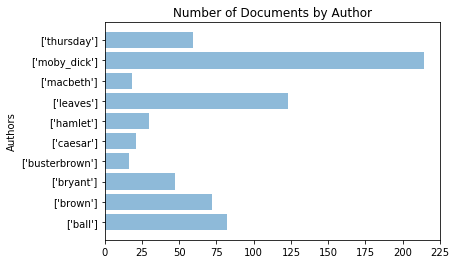

In [594]:
y_pos=np.arange(len(list(text_string_df.groupby('author_codes')['authors'].value_counts())))
plt.barh(y_pos,text_string_df.groupby('author_codes')['authors'].value_counts(), align='center', alpha=0.5)
plt.yticks(y_pos, text_string_df.groupby('author_codes')['authors'].unique())
plt.ylabel('Authors')
plt.title('Number of Documents by Author') 
plt.show()


# Generate Features

In [595]:
pd.set_option('display.max_columns', 500)

In [596]:
# Defining my X and Y variables
X = text_string_df.text
Y = text_string_df.author_codes

In [597]:
# load nltk's English stopwords as variable called 'stopwords' we will use this as a parameter
# in the CountVectorizer and TFIDF function
stopwords = nltk.corpus.stopwords.words('english')

In [598]:
#for testing purposes

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=3, # only use words that appear at least twice
                             stop_words=stopwords, 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )
#tfidf=vectorizer.fit_transform(combine_tokenized_liststring)
tfidf=vectorizer.fit_transform(X)
terms = vectorizer.get_feature_names()
X_tfidf = pd.DataFrame(data=tfidf.toarray(),
             columns=terms)

from sklearn.model_selection import train_test_split
#splitting into training and test sets. Reserving 25% of my corpus as a test set.
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, 
                                                                Y,
                                                                test_size=0.25,
                                                                random_state=0)



X_tfidf.head()



,10,11,12,13,14,15,16,17,18,1839,19,20,21,30,40,45,50,90,_had_,_he_,_page,_so_,_the,_was_,_you_,aback,abandon,abandoned,abandonment,abased,abated,abhorred,abide,ability,ablaze,able,abnormal,aboard,abominable,abomination,aboriginal,aborigine,aboue,abound,abounding,abraham,abreast,abroad,abrupt,abruptly,abruptness,absence,absent,absently,absentminded,absentmindedly,absolute,absolutely,absorb,absorbd,absorbed,absorbing,abstinence,abstract,abstracted,abstractedly,abstraction,absurd,absurdly,abundance,abundant,abuse,abyss,academy,accelerate,accent,accept,acceptance,accepted,accepting,accepts,accident,accidental,accidentally,accompanied,accompaniment,accompany,accompanying,accomplish,accomplishd,accomplished,accord,accordance,according,accordingly,accosted,account,accounted,accumulated,accumulation,accuracy,accurately,accursed,accused,accustomed,ache,achieve,achieved,achievement,aching,acknowledge,acknowledges,acknowledging,acorn,acquaintance,acquainted,acquire,acre,across,act,acte,acted,acting,action,active,actively,activity,actor,actress,actual,actually,actus,acute,ad,adam,adamantine,adapted,add,adde,added,adder,adding,addition,additional,address,addressed,addressing,adequately,adhere,adhering,adhesiveness,adieu,adjoining,admirable,admiral,admirals,admiration,admire,admired,admirer,admit,admits,admitted,admitting,ado,adobie,adopt,adopted,adoration,adorn,adrift,aduantage,aduice,aduise,adult,adulterous,advance,advanced,advancing,advantage,adventure,adventurer,adventures,adventurous,advice,advise,advised,adviser,advocate,aeneas,aesthetic,afar,affair,affaire,affayres,affeard,affect,affectation,affected,affecting,affection,affectionate,affliction,afford,afforded,affording,affraid,affright,affrighted,afloat,afoot,afore,afraid,afresh,africa,african,aft,afternoon,afterward,afterwards,againe,age,aged,agency,agent,ages,aggregate,aggressively,aghast,agitated,agitation,agnostic,ago,agonized,agonizing,agony,agree,agreed,agreeing,ague,ah,aha,ahab,ahabs,ahead,ahoy,aid,aide,aim,aimless,...,wildenesse,wilder,wilderness,wildest,wildly,wildness,wilful,wilkinson,wilkinsons,william,willing,willingly,willingness,willow,wilson,wilt,win,wince,wind,winde,windes,winding,windlass,windmill,window,windowes,windpipe,winds,windsor,windward,windy,wine,wineglass,wing,winged,wink,winked,winking,winne,winner,winning,winter,winters,wintry,wipe,wiped,wiping,wire,wisconsin,wisdom,wise,wisedome,wisely,wiser,wisest,wish,wishd,wished,wishing,wisp,wistful,wistfully,wit,witch,witchcraft,witchery,witches,withal,withall,withdraw,withdrawal,withdrawing,withdrawn,withdrew,witherd,withered,withheld,withhold,within,without,withstand,witness,witnesse,witty,woe,woke,wolf,wolfe,woman,womanhood,womanly,womans,womb,women,wonder,wondered,wonderful,wonderfull,wonderfully,wondering,wonderment,wonders,wondrous,wont,wonted,wood,wooded,wooden,woodland,woodpecker,woodpile,woods,woof,wool,woollen,word,wordless,words,wore,work,workd,worke,worked,worker,working,workingman,workman,workmanlike,workshop,world,worldly,worlds,worm,wormes,worms,worn,worried,worry,worse,worship,worshipper,worshipping,worst,worsted,worth,worthier,worthless,worthy,wouldnt,wouldst,wound,wounded,woven,wracke,wrap,wrapped,wrapping,wrapt,wrath,wreath,wreck,wreckd,wrecked,wren,wrench,wrenched,wrenching,wrest,wrestle,wrestled,wrestling,wretch,wretched,wriggling,wring,wringing,wrinkle,wrinkled,wrinkling,wrist,writ,write,writer,writhing,writing,written,wrong,wrongd,wrongly,wrote,wrought,wrung,xi,xii,xiii,xiv,xv,xvi,yacht,yankee,yankees,yard,yardarm,yarn,yawn,yawned,yawning,ye,yea,year,yeare,yearning,years,yee,yeeld,yell,yelled,yelling,yellow,yes,yesterday,yeve,yield,yielded,yielding,yoake,yojo,yoke,yoked,yon,yond,yonder,yong,york,yosemite,youd,youl,youll,young,younger,youngest,youngster,youre,youth,youthful,youve,zealand,zodiac,zone,zoological
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035795,0.0,0.0

In [599]:
#verify the index series. As a result of the test/train split I think the index our 
#no longer sequential
pd.Series.sort_index(X_train_tfidf).head()

,0
0,0.0
2,0.0
3,0.0
4,0.0
5,0.0


In [600]:
#The output above confirms the index are not sequential and this will cause problems for us
#during our model clustering so lets reset the index now for all of the test/train variables
X_train_tfidf = X_train_tfidf.reset_index(drop=True)
X_test_tfidf = X_test_tfidf.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
#X_train_tfidf

In [601]:
#verify the index series 
pd.Series.sort_index(X_train_tfidf).head()

,10,11,12,13,14,15,16,17,18,1839,19,20,21,30,40,45,50,90,_had_,_he_,_page,_so_,_the,_was_,_you_,aback,abandon,abandoned,abandonment,abased,abated,abhorred,abide,ability,ablaze,able,abnormal,aboard,abominable,abomination,aboriginal,aborigine,aboue,abound,abounding,abraham,abreast,abroad,abrupt,abruptly,abruptness,absence,absent,absently,absentminded,absentmindedly,absolute,absolutely,absorb,absorbd,absorbed,absorbing,abstinence,abstract,abstracted,abstractedly,abstraction,absurd,absurdly,abundance,abundant,abuse,abyss,academy,accelerate,accent,accept,acceptance,accepted,accepting,accepts,accident,accidental,accidentally,accompanied,accompaniment,accompany,accompanying,accomplish,accomplishd,accomplished,accord,accordance,according,accordingly,accosted,account,accounted,accumulated,accumulation,accuracy,accurately,accursed,accused,accustomed,ache,achieve,achieved,achievement,aching,acknowledge,acknowledges,acknowledging,acorn,acquaintance,acquainted,acquire,acre,across,act,acte,acted,acting,action,active,actively,activity,actor,actress,actual,actually,actus,acute,ad,adam,adamantine,adapted,add,adde,added,adder,adding,addition,additional,address,addressed,addressing,adequately,adhere,adhering,adhesiveness,adieu,adjoining,admirable,admiral,admirals,admiration,admire,admired,admirer,admit,admits,admitted,admitting,ado,adobie,adopt,adopted,adoration,adorn,adrift,aduantage,aduice,aduise,adult,adulterous,advance,advanced,advancing,advantage,adventure,adventurer,adventures,adventurous,advice,advise,advised,adviser,advocate,aeneas,aesthetic,afar,affair,affaire,affayres,affeard,affect,affectation,affected,affecting,affection,affectionate,affliction,afford,afforded,affording,affraid,affright,affrighted,afloat,afoot,afore,afraid,afresh,africa,african,aft,afternoon,afterward,afterwards,againe,age,aged,agency,agent,ages,aggregate,aggressively,aghast,agitated,agitation,agnostic,ago,agonized,agonizing,agony,agree,agreed,agreeing,ague,ah,aha,ahab,ahabs,ahead,ahoy,aid,aide,aim,aimless,...,wildenesse,wilder,wilderness,wildest,wildly,wildness,wilful,wilkinson,wilkinsons,william,willing,willingly,willingness,willow,wilson,wilt,win,wince,wind,winde,windes,winding,windlass,windmill,window,windowes,windpipe,winds,windsor,windward,windy,wine,wineglass,wing,winged,wink,winked,winking,winne,winner,winning,winter,winters,wintry,wipe,wiped,wiping,wire,wisconsin,wisdom,wise,wisedome,wisely,wiser,wisest,wish,wishd,wished,wishing,wisp,wistful,wistfully,wit,witch,witchcraft,witchery,witches,withal,withall,withdraw,withdrawal,withdrawing,withdrawn,withdrew,witherd,withered,withheld,withhold,within,without,withstand,witness,witnesse,witty,woe,woke,wolf,wolfe,woman,womanhood,womanly,womans,womb,women,wonder,wondered,wonderful,wonderfull,wonderfully,wondering,wonderment,wonders,wondrous,wont,wonted,wood,wooded,wooden,woodland,woodpecker,woodpile,woods,woof,wool,woollen,word,wordless,words,wore,work,workd,worke,worked,worker,working,workingman,workman,workmanlike,workshop,world,worldly,worlds,worm,wormes,worms,worn,worried,worry,worse,worship,worshipper,worshipping,worst,worsted,worth,worthier,worthless,worthy,wouldnt,wouldst,wound,wounded,woven,wracke,wrap,wrapped,wrapping,wrapt,wrath,wreath,wreck,wreckd,wrecked,wren,wrench,wrenched,wrenching,wrest,wrestle,wrestled,wrestling,wretch,wretched,wriggling,wring,wringing,wrinkle,wrinkled,wrinkling,wrist,writ,write,writer,writhing,writing,written,wrong,wrongd,wrongly,wrote,wrought,wrung,xi,xii,xiii,xiv,xv,xvi,yacht,yankee,yankees,yard,yardarm,yarn,yawn,yawned,yawning,ye,yea,year,yeare,yearning,years,yee,yeeld,yell,yelled,yelling,yellow,yes,yesterday,yeve,yield,yielded,yielding,yoake,yojo,yoke,yoked,yon,yond,yonder,yong,york,yosemite,youd,youl,youll,young,younger,youngest,youngster,youre,youth,youthful,youve,zealand,zodiac,zone,zoological
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# Generate clusters for K-means,MeanShift,SpectralClustering and AffinityPropagation

Top terms per cluster:
Cluster 0: 
Authour code: 6
haue
ham
lord
enter
thou
caesar
macb
king
brutus
bru


Cluster 1: 
Authour code: 7
ahab
whale
ye
boat
ship
queequeg
captain
stubb
sea
thou


Cluster 2: 
Authour code: 6
turnbull
macian
ebook
project
church
science
really
gutenberg
quite
catholic


Cluster 3: 
Authour code: 8
syme
gregory
anarchist
policeman
professor
serious
poet
police
girl
thursday


Cluster 4: 
Authour code: 8
margery
king
father
mother
came
jackal
fir
nightingale
tree
child


Cluster 5: 
Authour code: 6
love
soul
thee
shall
song
thy
earth
land
woman
city


Cluster 6: 
Authour code: 9
turnbull
macian
brown
father
quite
evan
door
looked
mr
garden


Cluster 7: 
Authour code: 6
whale
sperm
sea
boat
ship
leviathan
though
water
oil
chapter


Cluster 8: 
Authour code: 2
syme
bull
professor
marquis
dr
sunday
secretary
colonel
president
train


Cluster 9: 
Authour code: 6
buster
joe
bear
browns
farmer
otter
blacky
pool
trout
boy


Prediction


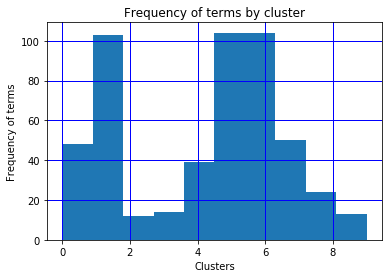

Comparing k-means clusters against authors:
col_0          0    1   2   3   4    5    6   7   8   9  Total
author_codes                                                  
0              0    0  11   0   0    0   56   0   0   0     67
1              0    0   0   0   8    0   46   0   0   0     54
2              0    0   0   0  28    2    0   1   0   0     31
3              0    0   0   0   0    0    0   0   0  13     13
4             14    0   0   0   0    0    0   0   0   0     14
5             21    0   0   0   0    0    0   0   0   0     21
6              0    0   0   0   3   98    0   0   0   0    101
7             13    0   0   0   0    0    0   0   0   0     13
8              0  103   0   0   0    4    2  49   0   0    158
9              0    0   1  14   0    0    0   0  24   0     39
Total         48  103  12  14  39  104  104  50  24  13    511


In [618]:
#The goal of the following code is to print the K-means clusters and top terms by author source.
#The model has a cluster centers attribute that returns the coordinates of each of the 
#k cluster centroids. Each token in the vectorizer we created earlier has a dimension or 
#coordinate in the centroid and represents its relative frequency within that cluster. 
#So to find the words with the highest frequency in a cluster, we have to locate the 
#indices of the highest values of the centroid, which then correspond to the indices of 
#the tokens in the vectorizer. Therefore, below are the top ten frequented words in 
#each cluster for K-Means



from sklearn.cluster import KMeans
n_clusters = 10
model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
model.fit(X_train_tfidf)
pred = model.predict(X_train_tfidf) 

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(n_clusters):
    print("Cluster %s: \nAuthour code: %s" %(i, np.array(y_train[i])))
    for ind in order_centroids[i, :10]:
        print('%s' % terms[ind])
    print("\n")
print("Prediction")

plt.hist(model.labels_, bins=n_clusters)
plt.xlabel('Clusters')
plt.grid(color='b', linestyle='-', linewidth=1)
plt.ylabel('Frequency of terms')
plt.title('Frequency of terms by cluster')
plt.show()

print('Comparing k-means clusters against authors:')
print(pd.crosstab(y_train, pred, margins=True, margins_name="Total"))

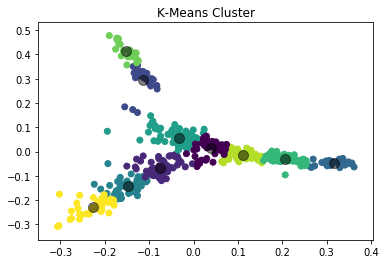

Comparing k-means clusters against author codes:
col_0          0   1   2   3   4   5   6   7   8   9  Total
author_codes                                               
0              5   0   0  28   0   1  26   0   7   0     67
1              5   0   0   0   0   0   2   0  47   0     54
2             26   1   0   0   0   4   0   0   0   0     31
3             12   0   0   0   0   0   0   0   1   0     13
4              0   0  13   0   0   0   0   1   0   0     14
5              0   0   3   0   0   0   0  18   0   0     21
6              9   0   3   0   0  89   0   0   0   0    101
7              0   0  11   0   0   0   0   2   0   0     13
8              8  54   0   0  51   5   0   0   1  39    158
9              2   0   0   0   0   0  29   0   8   0     39
Total         67  55  30  28  51  99  57  21  64  39    511


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,


In [619]:
#Running k-means cluster using with PCA to provide a graphically picture of the cluster
from sklearn.cluster import KMeans


# Normalize the data.
X_norm = normalize(X_train_tfidf)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
km = KMeans(n_clusters=10,n_init = 5, n_jobs = -1).fit(X_pca)
y_pred = km.fit_predict(X_pca)
#y_pred = KMeans(n_clusters=10,n_init = 5, n_jobs = -1).fit_predict(X_train)
labels = km.labels_

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)

centers =km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.title('K-Means Cluster')
plt.show()

#Print out result of pca
print('Comparing k-means clusters against author codes:')
print(pd.crosstab(y_train, y_pred, margins=True, margins_name="Total"))

#create a result table
data = [{'Cluster':'K-Means', 'Number of clusters': n_clusters, 'RI Score': '',
         'RI adjusted score': ''}]
df_results = pd.DataFrame(data)

df_results

Number of estimated clusters: 8


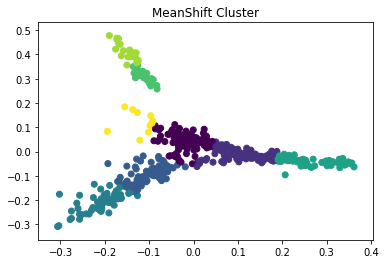

Comparing meanshift clusters against authors:
col_0           0    1   2   3   4   5   6   7  Total
author_codes                                         
0               2   13   0   0  52   0   0   0     67
1               0   54   0   0   0   0   0   0     54
2              22    8   1   0   0   0   0   0     31
3               0   13   0   0   0   0   0   0     13
4               0    0   0   0   0  13   1   0     14
5               0    0   0   0   0   3  18   0     21
6              92    0   0   0   0   0   0   9    101
7               0    0   0   0   0  11   2   0     13
8              15    7  79  56   0   0   0   1    158
9               1   21   0   0  17   0   0   0     39
Total         132  116  80  56  69  27  21  10    511


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,


In [620]:
#mean shift

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.1, n_samples=X_tfidf.shape[0])


# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_pca)
ms_pred = ms.fit_predict(X_pca)
#ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
#print ("Labels identified: {}".format(labels)) # dosn't tell me much as it is just numbers

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('MeanShift Cluster')
plt.show()

print('Comparing meanshift clusters against authors:')
print(pd.crosstab(y_train, ms_pred, margins=True, margins_name="Total"))
#update result table
data = [{'Cluster':'MeanShift', 'Number of clusters': n_clusters_, 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results



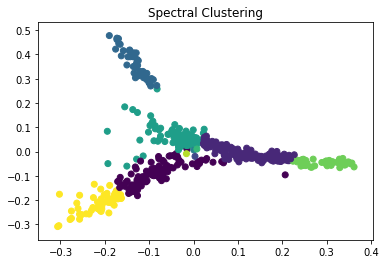

Comparing spectral clusters against authors:
col_0           0    1   2   3    4  5   6  7  8  9  Total
author_codes                                              
0              21    2   0   0    2  0  42  0  0  0     67
1              53    0   0   0    1  0   0  0  0  0     54
2              25    5   0   0    1  0   0  0  0  0     31
3              13    0   0   0    0  0   0  0  0  0     13
4               0    0   0  14    0  0   0  0  0  0     14
5               0    0   0  21    0  0   0  0  0  0     21
6               2   95   0   0    1  1   0  1  0  1    101
7               0    1   0  12    0  0   0  0  0  0     13
8               0    8  52   0   97  0   0  0  1  0    158
9              37    0   0   0    0  0   2  0  0  0     39
Total         151  111  52  47  102  1  44  1  1  1    511


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,
0,SpectralClustering,10,,


In [621]:
#apectral clustering
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=10

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)
sc_pred = sc.fit_predict(X_pca)

#Predicted clusters.
predict=sc.fit_predict(X_pca)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.title('Spectral Clustering')
plt.show()

print('Comparing spectral clusters against authors:')
print(pd.crosstab(y_train, sc_pred, margins=True, margins_name="Total"))

#update result table
data = [{'Cluster':'SpectralClustering', 'Number of clusters': n_clusters, 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

In [622]:
pd.set_option('display.max_columns', 500)
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_pca)
af_pred = af.fit_predict(X_pca)
#print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Comparing affinity clusters against authors:')
print(pd.crosstab(y_train, af_pred, margins=True, margins_name="Total"))
print('Estimated number of clusters: {}'.format(n_clusters_))

#update result table
data = [{'Cluster':'AffinityPropagation', 'Number of clusters': len(cluster_centers_indices), 'RI Score': '',
         'RI adjusted score': ''}]

d2 = pd.DataFrame(data)
df_results = df_results.append(d2) 

df_results

Comparing affinity clusters against authors:
col_0          0   1   2   3   4   5   6   7   8   9  10  11  12  13  Total
author_codes                                                               
0              0   0  24   0   2   0   0   0   0  26   0   0   7   8     67
1              0   0   0   0   0   0   0   0   0   0   0   0   9  45     54
2              0   0   0   0  21   0   2   1   0   0   0   0   0   7     31
3              0   0   0   0   0   0   0   0   0   0   0   0   0  13     13
4              0   0   0   0   0   0   0   0   0   0   0  14   0   0     14
5              0   0   0   0   0  18   0   0   0   0   0   3   0   0     21
6              0   0   0  13  41   0  45   0   0   0   2   0   0   0    101
7              0   0   0   0   0   2   0   0   0   0   0  11   0   0     13
8             14  31   0   1   0   0   3  44  35   0  29   0   0   1    158
9              0   0   0   0   1   0   0   0   0   5   0   0  30   3     39
Total         14  31  24  14  65  20  50  4

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
0,MeanShift,8,,
0,SpectralClustering,10,,
0,AffinityPropagation,14,,


In [623]:
#reset the index so that I can update the RI and adjusted score later.
df_results = df_results.reset_index(drop=True)
df_results

,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,,
1,MeanShift,8,,
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


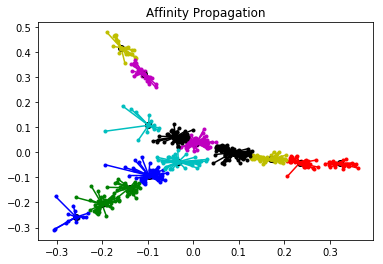

In [625]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_pca[cluster_centers_indices[k]]
    plt.plot(X_pca[class_members, 0], X_pca[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_pca[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.title('Affinity Propagation')
plt.show()

# Evaluate the accurcy for each of the clusters

In [626]:
# Note: the itertools module is tons of fun and very useful.
from sklearn.metrics import silhouette_score
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.

#y_pred = k-means

c = list(itertools.product(y_train, y_pred))

#print("this is the product of y and y_pred:",c[21])

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print("The RIcounts are:", RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
#RI score is the ratio of the number of pairs where the ground truth and the new solution 
#agree, over the total number of pairs.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
print("The RIscore is:", RIscore)

from sklearn import metrics

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, y_pred)
print("The adjusted rand score is:",RIadjusted )
#print('Silhouette Score: {:0.7}'.format(silhouette_score(X, y_pred, metric='euclidean')))

#update the result table with the RI score and adjust score
df_results.loc[[0],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The RIscore is: 0.01717594525143516
The adjusted rand score is: 0.47376940404066414


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0171759,0.473769
1,MeanShift,8,,
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


In [627]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = mean shift
c = list(itertools.product(y_train, ms_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
#print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, ms_pred)
print("The adjusted rand score is:",RIadjusted)


#update the result table with the RI score and adjust score
df_results.loc[[1],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The adjusted rand score is: 0.4650320876652376


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0171759,0.473769
1,MeanShift,8,0.0289061,0.465032
2,SpectralClustering,10,,
3,AffinityPropagation,14,,


In [628]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = spectural clustering
c = list(itertools.product(y_train, sc_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
#print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, sc_pred)
print("The adjusted rand score is:",RIadjusted)


#update the result table with the RI score and adjust score
df_results.loc[[2],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The adjusted rand score is: 0.4955234652704561


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0171759,0.473769
1,MeanShift,8,0.0289061,0.465032
2,SpectralClustering,10,0.00935582,0.495523
3,AffinityPropagation,14,,


In [629]:
# Note: the itertools module is tons of fun and very useful.
import itertools

# Create a list of pairs, where each pair is the ground truth group
# and the assigned cluster.
#y_pred = affinity propergation
c = list(itertools.product(y_train, af_pred))

# Count how often each type of pair (a, b, c, or d) appears.
RIcounts = [[x, c.count(x)] for x in set(c)]
#print(RIcounts)

# Create the same counts but without the label, for easier math below.
RIcounts_nolabel = [c.count(x) for x in set(c)]

# Calculate the Rand Index.
RIscore = (RIcounts_nolabel[3] + RIcounts_nolabel[2]) / np.sum(RIcounts_nolabel)
#print("The RIscore is:",RIscore)

#adjusted rand for k-means
RIadjusted = metrics.adjusted_rand_score(y_train, af_pred)
print("The adjusted rand score is:",RIadjusted)

#update the result table with the RI score and adjust score
df_results.loc[[3],['RI Score','RI adjusted score']]= RIscore,RIadjusted
df_results

The adjusted rand score is: 0.343228336499129


,Cluster,Number of clusters,RI Score,RI adjusted score
0,K-Means,10,0.0171759,0.473769
1,MeanShift,8,0.0289061,0.465032
2,SpectralClustering,10,0.00935582,0.495523
3,AffinityPropagation,14,0.0138365,0.343228


# In summation based on my results table none of my clusters are predicting a 100% agreement between my ground truth and my solution but Spectral Clusterin is predicting the higher RI adjusted score and implies it is predicting the most accurate number of clusters. 

# Generate Models

In [637]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


from sklearn import ensemble
from sklearn.model_selection import train_test_split

knn = KNeighborsClassifier(n_neighbors=10)
train = knn.fit(X_train_tfidf, y_train)
y_pred = knn.predict(X_test_tfidf)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(knn, X_train_tfidf, y_train, cv=5)
cv_results_test = cross_val_score(knn, X_test_tfidf, y_test, cv=5)
print('KNN Training mean set score:', cv_results_train.mean())
print('KNN Testing mean set score:', cv_results_test.mean())

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('\n KNN Confustion Matrix \n', confusion_matrix(y_test,y_pred))  
print('\n KNN Classification Report \n', classification_report(y_test,y_pred))  
print('\n KNN accuracy score:', accuracy_score(y_test, y_pred))  

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


KNN Training mean set score: 0.9786117517268057
KNN Testing mean set score: 0.9363743799727022

 KNN Confustion Matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  1 14  0  0  0  1  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 20]]

 KNN Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       0.96      1.00      0.98        22
           7       1.00      1.00      1.00         5
           8       1.00      1.

In [632]:
#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
#find accuracy on y_test and y_predictions

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


from sklearn import ensemble
from sklearn.model_selection import train_test_split

svc = LinearSVC()
train = svc.fit(X_train_tfidf, y_train)
y_pred = svc.predict(X_test_tfidf)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(svc, X_train_tfidf, y_train, cv=5)
cv_results_test = cross_val_score(svc, X_test_tfidf, y_test, cv=5)
print('SVC Training mean set score:', cv_results_train.mean())
print('SVC Testing mean set score:', cv_results_test.mean())

print('\n Support vector cufusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Support vector classification report \n',classification_report(y_test,y_pred))  
print('\n Support vector accuracy score:',accuracy_score(y_test, y_pred))  

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


SVC Training mean set score: 0.9942846872753414
SVC Testing mean set score: 0.9827296736464819

 Support vector cufusion matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  1  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  0  0  0 20]]

 Support vector classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00         5
           

In [633]:
#Execute the RandomForestClassifier Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
train = rfc.fit(X_train_tfidf, y_train)
y_pred = rfc.predict(X_test_tfidf)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(rfc, X_train_tfidf, y_train, cv=5)
cv_results_test = cross_val_score(rfc, X_test_tfidf, y_test, cv=5)
print('RFC Training mean set score:', cv_results_train.mean())
print('RFC Testing mean set score:', cv_results_test.mean())

print('\n Random Forest confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Random Forest classification report \n',classification_report(y_test,y_pred))  
print('Random Forest accuracy score:',accuracy_score(y_test, y_pred)) 

RFC Training mean set score: 0.8046533422135997
RFC Testing mean set score: 0.6543994196433525

 Random Forest confusion matrix 
 [[10  3  0  0  0  0  1  0  1  0]
 [ 4 12  0  0  0  0  0  0  1  1]
 [ 1  1 11  0  0  0  2  0  1  0]
 [ 1  0  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  4  2  1  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  1  0  4  0  0]
 [ 0  0  0  0  0  0  1  0 55  0]
 [ 1  2  0  0  0  0  3  0  4 10]]

 Random Forest classification report 
               precision    recall  f1-score   support

           0       0.59      0.67      0.62        15
           1       0.67      0.67      0.67        18
           2       0.92      0.69      0.79        16
           3       1.00      0.33      0.50         3
           4       1.00      0.57      0.73         7
           5       0.75      1.00      0.86         9
           6       0.73      1.00      0.85        22
           7       1.00      0.80      0.89         5
           8

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [634]:
#Execute the LogisticRegression Model
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train_tfidf, y_train)
y_pred = lr.predict(X_test_tfidf)

#compare the training and testing results using cross validation
#remove the warnings related to default parameters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(lr, X_train_tfidf, y_train, cv=5)
cv_results_test = cross_val_score(lr, X_test_tfidf, y_test, cv=5)
print('LR Training mean set score:', cv_results_train.mean())
print('LR Testing mean set score:', cv_results_test.mean())

print('\n Logistic regression confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Logistic classification report \n',classification_report(y_test,y_pred))  
print('Logistic accuracy score: ',accuracy_score(y_test, y_pred)) 



/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


LR Training mean set score: 0.9240892056625226
LR Testing mean set score: 0.5687751756050468

 Logistic regression confusion matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  4  0  7  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0 56  0]
 [ 0  0  0  0  0  0  1  0  0 19]]

 Logistic classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        18
           2       1.00      0.31      0.48        16
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       0.81      1.00      0.90        22
           7       1.00      1.00      1.00         5
           8 

In [635]:
#Execute the GradientBoostingClassifier Model
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

#compare the training and testing results using cross validation
from sklearn.model_selection import cross_val_score
cv_results_train = cross_val_score(clf, X_train_tfidf, y_train, cv=5)
cv_results_test = cross_val_score(clf, X_test_tfidf, y_test, cv=5)
print('Gradient Training mean set score:', cv_results_train.mean())
print('Gradient Testing mean set score:', cv_results_test.mean())

print('\n Gradient Boosting confusion matrix \n',confusion_matrix(y_test,y_pred))  
print('\n Gradient Boosting classification report \n',classification_report(y_test,y_pred))  
print('Gradient Boosting accuracy score:',accuracy_score(y_test, y_pred)) 




/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:626: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Gradient Training mean set score: 0.9413435644920112
Gradient Testing mean set score: 0.8592366035265266

 Gradient Boosting confusion matrix 
 [[15  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  1  0  2  0]
 [ 0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  1  0]
 [ 0  1  0  0  0  0 21  0  0  0]
 [ 0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  1  0  0 55  0]
 [ 0  0  0  0  0  0  0  0  0 20]]

 Gradient Boosting classification report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.81      0.90        16
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         7
           5       0.89      0.89      0.89         9
           6       0.95      0.95      0.95        22
           7       1.00      1.00      1.00     

# Overall Model performance:
# KNN and SVM where consistent with each other with as their accuracy scores range from 98 and 99%
# Logistic regression, Random forest and Gradient boosting were not consistent as their accuracy scores range from 80, 92 and 96%

